In [1]:
import numpy as np

In [2]:
c = np.array([[1,0,0,0,0,0,0,]])
w = np.random.randn(7,3)
h = np.dot(c,w)
print(h)

[[-0.09097903 -0.02843779 -1.16123503]]


In [3]:
import sys
sys.path.append('..')
from common.layers import MatMul, SoftmaxWithLoss

c0 = np.array([[1,0,0,0,0,0,0,]])
c1 = np.array([[0,0,1,0,0,0,0]])

W_in = np.random.randn(7,3)
W_out = np.random.randn(3,7)

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

In [4]:
from common.util import preprocess, create_contexts_target, convert_one_hot

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)
print(corpus)
print(id_to_word)

[0 1 2 3 4 1 5 6]
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [5]:
def create_contexts_target(corpus, window_size =1):
    target = corpus[window_size: -window_size]
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size +1):
            if t == 0:
                continue
            cs.append(corpus[idx + t])
        contexts.append(cs)
        
    return np.array(contexts), np.array(target)

contexts, target = create_contexts_target(corpus, window_size =1)
print(contexts)
print(target)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]
[1 2 3 4 1 5]


In [6]:
vocab_size = len(word_to_id)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [7]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V,H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V,H).astype('f')
        W_out = 0.01*np.random.randn(h,V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
        
        self.word_vecs =W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:,0])
        h1 = self.in_layer1.forward(contexts[:,1])
        h = (h0 + h1)*0.5
        score = self.out_layer.forward(h)
        loss  = self.loss_layer.forward(score,target)
        return loss

In [8]:
from common.trainer import Trainer
from common.optimizer import Adam 
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 690 |  iter 1 / 2 | time 0[s] | loss 0.81
| epoch 691 |  iter 1 / 2 | time 0[s] | loss 0.38
| epoch 692 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 693 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 694 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 695 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 696 |  iter 1 / 2 | time 0[s] | loss 0.56
| epoch 697 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 698 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 699 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 700 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 701 |  iter 1 / 2 | time 0[s] | loss 0.69
| epoch 702 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 703 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 704 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 705 |  iter 1 / 2 | time 0[s] | loss 0.80
| epoch 706 |  iter 1 / 2 | time 0[s] | loss 0.44
| epoch 707 |  iter 1 / 2 | time 0[s] | loss 0.73
| epoch 708 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 709 |  iter 1 / 2 | time 0[s] | loss 0.64


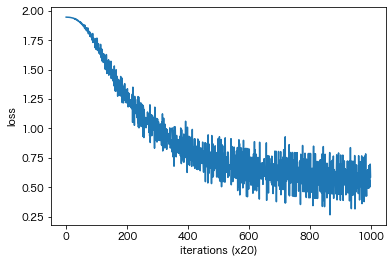

In [10]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vacab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [11]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])


you [ 1.1858884  1.1547388 -1.163861   1.1582016  1.1795509]
say [-0.41525877 -1.2329248   1.2820884  -1.2393321  -0.31477505]
goodbye [ 0.71310765  0.8957909  -0.7136559   0.7987427   0.7684062 ]
and [-1.6291991 -1.0057765  1.0613717 -1.0421262 -1.5858563]
i [ 0.69300526  0.8794782  -0.7111369   0.79074425  0.7480468 ]
hello [ 1.1957078  1.1623113 -1.1623477  1.1530477  1.1848933]
. [ 1.6052834 -1.0565565  1.1222177 -1.0978453  1.5433749]


In [12]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 1.1858884  1.1547388 -1.163861   1.1582016  1.1795509]
say [-0.41525877 -1.2329248   1.2820884  -1.2393321  -0.31477505]
goodbye [ 0.71310765  0.8957909  -0.7136559   0.7987427   0.7684062 ]
and [-1.6291991 -1.0057765  1.0613717 -1.0421262 -1.5858563]
i [ 0.69300526  0.8794782  -0.7111369   0.79074425  0.7480468 ]
hello [ 1.1957078  1.1623113 -1.1623477  1.1530477  1.1848933]
. [ 1.6052834 -1.0565565  1.1222177 -1.0978453  1.5433749]
